# Loan Amortization Schedule Calculator
Whitney Rueckl <br>
Summer 2022

This loan amortization calculator assumes *monthly level payments*. Calculations are done using a calss called `AmortizationCalculator` and also with standalone functions at the end of the notebook.

In [1]:
# Pandas & Numpy - data manipulation (dataframes & arrays)
import pandas as pd
import numpy as np
import math

# OS - for a function to get the working directory
#import os
#import time

#matplotlib - functions for plotting
import matplotlib.pyplot as plt
# import matplotlib as mpl
# import plotly.express as px
# import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for large numbers
pd.options.display.float_format = '{:.2f}'.format


### Formulas:


Let: <br>
- ${A}=$ payment amount per period
- ${L}=$ initial principal (loan amount)
- ${P_{k}}=$ oustanding principle at time k
- ${Q_{k}}=$ principle payment at time k
- $i=$ interest rate per period
- $n=$ total number of payments or periods

Payment amount:
$$
A=L \frac{i(1+r)^n}{(1+i)^n-1}
$$


Outstanding Principle at time *k*:
$$
P_k=L(1+i)^t-\frac{A((1+i)^t - 1)}{i}
$$

<br>

Principle payment made at time *k*:
$$
{Q_{k}}={P_{k+1}}-{P_{k}}
$$

### The `AmortizationCalculator` class

In [103]:
class AmortizationCalculator(object):
    
    def __init__(self, loan_amt, i, n):
    
        """
        Initialize the Amortization Calculator class.
        Assumes monthly payments.

        Parameters:
        loan_amt: initial loan amount
        i: monthly interest rate
        n: total number of payments
        t: number of payments up to time t

        """

        self.loan_amt = loan_amt
        self.i = i
        self.n = n
        
    
    def calcMonthlyPmt(self):
    
        """ 
        Calculate the monthly payment (level payments only)
        loan_amt: initial loan amount
        i: monthly interest rate
        n: total number of payments
        
        """

        loan_amt = self.loan_amt
        i = self.i
        n = self.n
        #t = self.t

        payment = loan_amt*i*(1 + i)**n / ((1 + i)**n - 1)

        return payment
    
    
    def calcPrinciple(self, t):
    
        """ 
        Calculate principle for month t
        loan_amt: intial loan amount
        A: monthly payment
        i: monthly intrest rate
        t: number of payments

        """
        
        loan_amt = self.loan_amt
        i = self.i
        n = self.n
        
        A = self.calcMonthlyPmt()
        
        principle = loan_amt*((1 + i)**t) - A*((1 + i)**t - 1)/i

        return principle

    
    def calcSchedule(self):

        """ 
        Calculate the amortization schedule.
        Returns a dataframe.
        
        Parameters: 
        
        loan_amt: intial loan amount
        i: monthly intrest
        n: total number of payments
        
        """
        
        loan_amt = self.loan_amt
        i = self.i
        n = self.n
        #t = self.t   
        
        sched_row = []
        
        A = self.calcMonthlyPmt()
        
        princ_prior = self.loan_amt
        
        for k in range(1, n+1):
            princ_curr = self.calcPrinciple(k)
            princ_pmt = princ_prior - princ_curr
            int_pmt = A - princ_pmt
            sched_row.append([k, princ_pmt, int_pmt, princ_curr])
            princ_prior = princ_curr
            
        return pd.DataFrame(sched_row, columns=['month', 'principle_pmt', 'interest_pmt', 'outst_principle'])


#### Initialize the amortization calculator class

In [104]:
# Using:
# Loan amount = $10,0000
# Annual interest rate = 5%
# Term = 36 months

amort_calc = AmortizationCalculator(10000, .05/12, 36)

#### Calculate the amortization schedule

In [105]:
df_schedule = amort_calc.calcSchedule()
df_schedule

,month,principle_pmt,interest_pmt,outst_principle
0,1,258.04,41.67,9741.96
1,2,259.12,40.59,9482.84
2,3,260.20,39.51,9222.64
3,4,261.28,38.43,8961.36
4,5,262.37,37.34,8698.99
5,6,263.46,36.25,8435.53
6,7,264.56,35.15,8170.97
7,8,265.66,34.05,7905.30
8,9,266.77,32.94,7638.53
9,10,267.88,31.83,7370.65


#### Plot outstanding principle, principle payments, and the interest payments over the life of the loan according to the amortization schedule

<AxesSubplot:title={'center':'Outstanding Principle over the Life of the Loan'}, xlabel='month'>

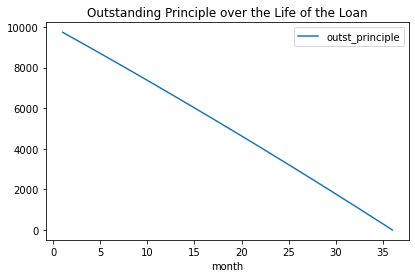

In [106]:
fig, axs = plt.subplots(1, 1, figsize=(6.5, 4))
df_schedule.plot(x = 'month', y = 'outst_principle', title = 'Outstanding Principle over the Life of the Loan', ax=axs)

Text(0.5, 1.0, 'Principle Payment over the Life of the Loan')

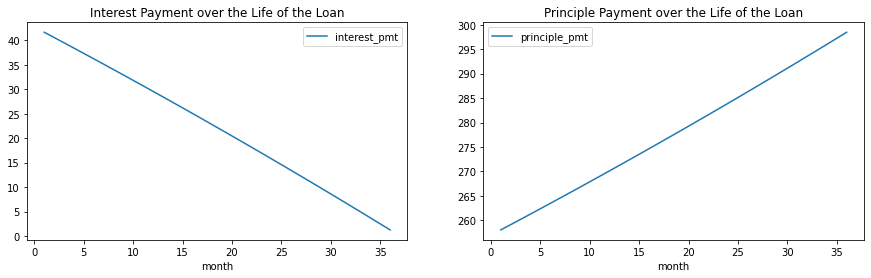

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

df_schedule.plot(x = 'month', y = 'interest_pmt', ax=axs[0])
axs[0].set_title('Interest Payment over the Life of the Loan')

df_schedule.plot(x = 'month', y = 'principle_pmt', ax=axs[1])
axs[1].set_title('Principle Payment over the Life of the Loan')

In [ ]:
# n = 36
# arr_princ = np.zeros(n+1)

# for k in range(1, n+1):
#     arr_princ[k] = amort_calc.calcPrinciple(t=k)
    
# arr_princ

### Standalone functions:

In [27]:
def calcMonthlyPmt(loan_amt, i, n):
    
    """ 
    Calculate the monthly payment (level payments only)
    loan_amt: initial loan amount
    i: monthly interest rate
    n: total number of payments
    """
    
    payment = loan_amt*i*(1 + i)**n / ((1 + i)**n - 1)
    
    return payment


In [28]:
pmt = calcMonthlyPmt(10000, .05/12, 36)
pmt

299.7089710466555

In [25]:
def calcPrinciple(loan_amt, A, i, t):
    
    """ 
    Calculate principle for month t
    
    loan_amt: intial loan amount
    A: monthly payment
    i: monthly intrest rate
    t: number of payments
    
    """
    principle = loan_amt*((1 + i)**t) - A*((1 + i)**t - 1)/i
    
    return principle

In [30]:
calcPrinciple(loan_amt = 10000, A = pmt, i = .05/12, t = 6)

8435.528651213162

In [36]:
n = 36
arr_princ = np.zeros(n+1)

for k in range(1, n+1):
    arr_princ[k] = calcPrinciple(loan_amt = 10000, A = pmt, i = .05/12, t = k)
    

In [37]:
arr_princ

array([   0.        , 9741.95769562, 9482.84021497, 9222.64307815,
       8961.3617866 , 8698.991823  , 8435.52865121, 8170.96771621,
       7905.30444398, 7638.53424145, 7370.65249641, 7101.65457744,
       6831.53583379, 6560.29159539, 6287.91717266, 6014.4078565 ,
       5739.75891818, 5463.9656093 , 5187.02316162, 4908.92678708,
       4629.67167765, 4349.25300526, 4067.66592173, 3784.90555869,
       3500.96702748, 3215.84541904, 2929.53580391, 2642.03323205,
       2353.3327328 , 2063.42931481, 1772.3179659 , 1479.99365305,
       1186.45132222,  891.68589835,  595.69228522,  298.46536536,
          0.        ])

In [33]:
def calcSchedule(loan_amt, i, n):
    
    """ calculate the amortization schedule
    loan_amt: intial loan amount
    r: monthly intrest
    n: total number of payments
    """
    monthly = []
    A = calcMonthlyPmt(loan_amt, i, n)
    last = loan_amt
    for k in range(1, n+1):
        curr = calcPrinciple(loan_amt, A, i, k)
        princ_pmt = last - curr
        int_pmt = A - princ_pmt
        monthly.append([k, princ_pmt, int_pmt, curr])
        last = curr
    return pd.DataFrame(monthly, columns=['month', 'principle_pmt', 'interest_pmt', 'outst_principle'])


In [34]:
df_schedule = calcSchedule(loan_amt = 10000, i = .05/12, n = 36)
df_schedule

,month,principle_pmt,interest_pmt,outst_principle
0,1,258.04,41.67,9741.96
1,2,259.12,40.59,9482.84
2,3,260.20,39.51,9222.64
3,4,261.28,38.43,8961.36
4,5,262.37,37.34,8698.99
5,6,263.46,36.25,8435.53
6,7,264.56,35.15,8170.97
7,8,265.66,34.05,7905.30
8,9,266.77,32.94,7638.53
9,10,267.88,31.83,7370.65
